# 无监督学习
也就是只有特征没有标签的自学习

聚类：将数据分成多个组，探索每个组的数据是否有联系。无监督，无需标签进行训练。K-Means

分类：从已经分组的数据中去学习，把新数据放到已经分好的组中去。有监督，需要标签进行训练。决策树，贝叶斯

# K-means原理

簇的个数K是一个超参数，需要我们人为输入来确定。KMeans的核心任务就是根据我们设定好的K，找出K个最优的质心，并将离这些质心最近的数据分别分配到这些质心代表的簇中去。

模型首先随机抽取k个质心，然后算每个点距离最近的质心，分成k族，对每一个族，算中心平均值作为新质心，如此循环直到质心位置不再变化。

# sklearn.cluster.KMeans

重要参数n_clusters

n_clusters是KMeans中的k，表示着我们告诉模型我们要分几类。

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## 生成数据

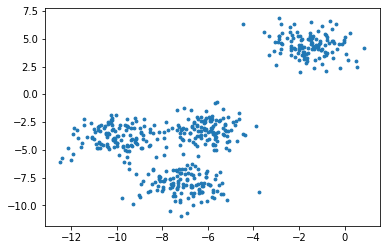

In [8]:
# 自己创建数据集
X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)
# 创建500个点，两个维度的特征，四个中心
fig, ax1 = plt.subplots(1)
ax1.scatter(X[:, 0], X[:, 1]
           ,marker='o' #点的形状
           ,s=8 #点的大小
           )
plt.show()

In [10]:
X

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

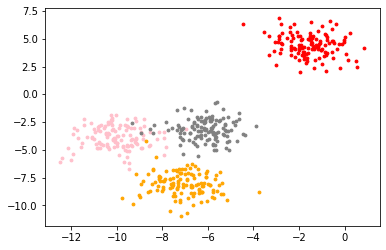

In [3]:
#如果我们想要看见这个点的分布，怎么办？

color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)
for i in range(4):
    ax1.scatter(X[y==i, 0], X[y==i, 1]
           ,marker='o' #点的形状
           ,s=8 #点的大小
           ,c=color[i]
           )
plt.show()

# 聚类

In [4]:
from sklearn.cluster import KMeans

n_clusters = 3 # 先分三类
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
y_pred = cluster.labels_
y_pred

array([2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0,

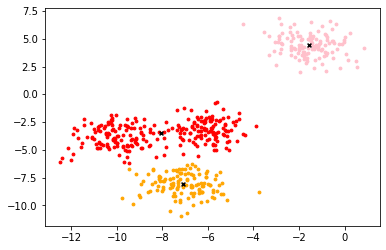

In [5]:
centroid = cluster.cluster_centers_
centroid

color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)
for i in range(n_clusters):
    ax1.scatter(X[y_pred==i, 0], X[y_pred==i, 1]
           ,marker='o'
           ,s=8
           ,c=color[i]
           )
ax1.scatter(centroid[:,0],centroid[:,1]
           ,marker="x"
           ,s=15
           ,c="black") # 中心点用x表示
plt.show()

In [7]:
n_clusters = 4

cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_ # 随着K越大，Inertia注定会越来越小

908.3855684760615

## 评估

通过衡量簇内差异来衡量聚类的效果：随着K越大，Inertia注定会越来越小，但这并不代表模型的效果越来越好了

轮廓系数：-1到1之间，越接近1越好

在sklearn中，我们使用模块metrics中的类silhouette_score来计算轮廓系数，依赖于评价簇内的稠密程度（簇内差异小）和簇间的离散程度（簇外差异大）来评估聚类的效果。还有同在metrics模块中的silhouette_sample，它的参数与轮廓系数一致，但返回的是数据集中每个样本自己的轮廓系数。


In [10]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

silhouette_score(X,y_pred) # 特征矩阵，在特征矩阵上分好的类
# 这里是分三个类的结果


0.5882004012129721

In [11]:
silhouette_score(X,cluster_.labels_)
# cluster_.labels_是分四个类的结果

0.6505186632729437

In [12]:
silhouette_samples(X,y_pred) # 有少许负值

array([ 0.62982017,  0.5034877 ,  0.56148795,  0.84881844,  0.56034142,
        0.78740319,  0.39254042,  0.4424015 ,  0.48582704,  0.41586457,
        0.62497924,  0.75540751,  0.50080674,  0.8452256 ,  0.54730432,
        0.60232423,  0.54574988,  0.68789747,  0.86605921,  0.25389678,
        0.49316173,  0.47993065,  0.2222642 ,  0.8096265 ,  0.54091189,
        0.30638567,  0.88557311,  0.84050532,  0.52855895,  0.49260117,
        0.65291019,  0.85602282,  0.47734375,  0.60418857,  0.44210292,
        0.6835351 ,  0.44776257,  0.423086  ,  0.6350923 ,  0.4060121 ,
        0.54540657,  0.5628461 ,  0.78366733,  0.37063114,  0.35132112,
        0.74493029,  0.53691616,  0.36724842,  0.87717083,  0.79594363,
        0.84641859,  0.38341344,  0.42043012,  0.4024608 ,  0.64639537,
        0.46244151,  0.31853572,  0.10047008,  0.37909034,  0.56424494,
        0.86153448,  0.82630007,  0.53288582,  0.35699772,  0.86994617,
        0.52259763,  0.71296285,  0.5269434 ,  0.42375504,  0.31

In [13]:
silhouette_samples(X,y_pred) > 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [14]:
silhouette_samples(X,cluster_.labels_) > 0 # 四个基本上没有负值

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# 根据轮廓系数调参

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


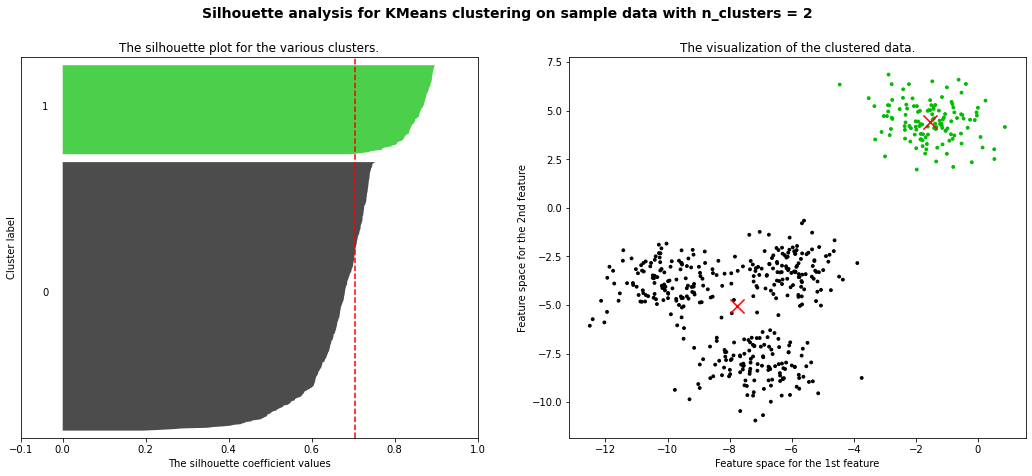

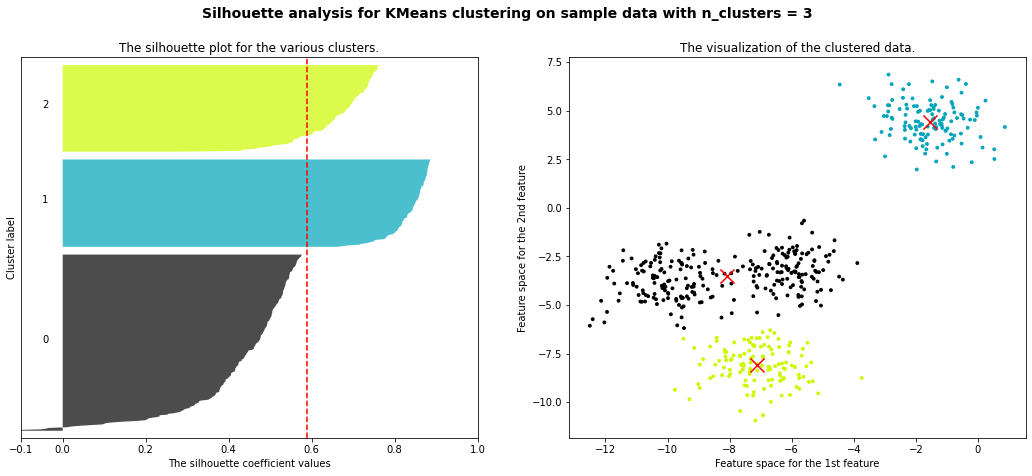

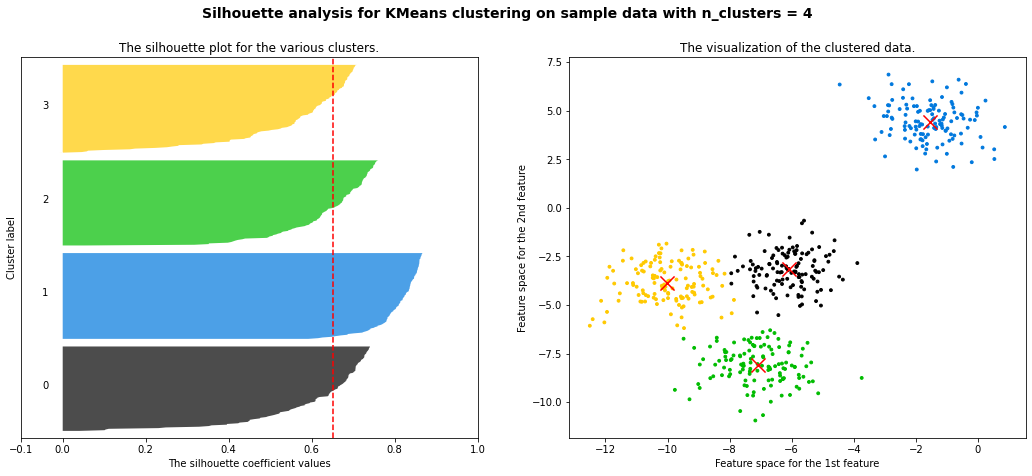

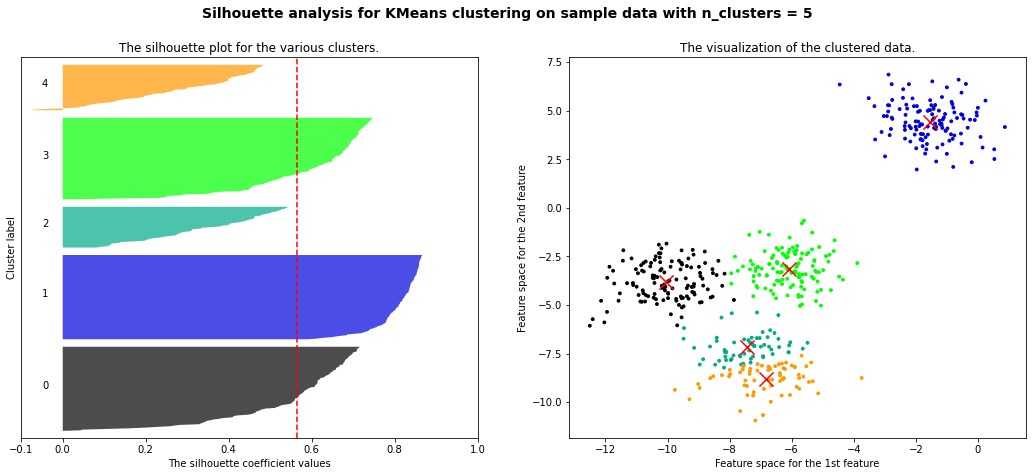

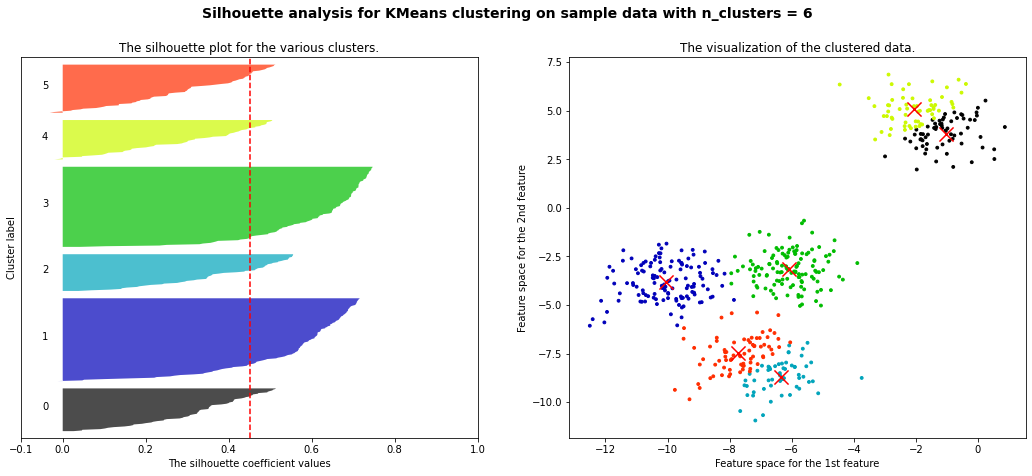

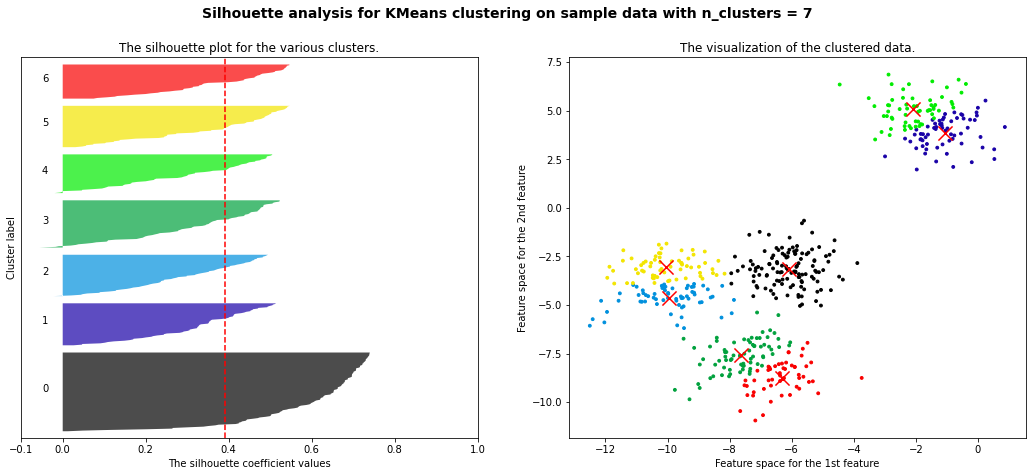

In [16]:
for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                         ,ith_cluster_silhouette_values
                         ,facecolor=color
                         ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1]
               ,marker='o'
               ,s=8
               ,c=colors
               )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
    "with n_clusters = %d" % n_clusters),
    fontsize=14, fontweight='bold')
plt.show()

# 虽然24都很好，此时一般依赖于业务判断